In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import matplotlib as mpl
from jupyterthemes import jtplot #These two lines can be skipped if you are not using jupyter themes
jtplot.reset()

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.314)
import scipy as sp
import multiprocessing as mp

from matplotlib.ticker import StrMethodFormatter
import time
start_total = time.time()

In [2]:
import os
my_path = '/home/tomi/Documentos/Fisica/Tesis/escrito-tesis/images/'

In [3]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

In [4]:
zl = 0.2; zs = 1.2
Dl = cosmo.angular_diameter_distance(zl)   
Ds = cosmo.angular_diameter_distance(zs)    
Dls = cosmo.angular_diameter_distance_z1z2(zl, zs)
G = const.G
rho_crit = (cosmo.critical_density(zl)).to(u.kg/u.m**3)
c_light = (const.c).to(u.cm/u.second)

#r0 = 10*u.kpc
r0 = 10.0*u.kpc
#r0 = 0.1*u.kpc
pi = np.pi

def scale_radius(v,Dl,Ds,Dls):                               #this is e0 in eq 3.42 meneghetti, eq 1 barnacka 2014
    return (4.*pi*v**2/c_light**2*Dl*Dls/Ds).decompose()
def theta_E_SIS():
    'in arcsec'
    pre_theta_E = (scale_radius(v,Dl,Ds,Dls)/Dl).decompose()
    return pre_theta_E*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 

v = 180 *u.km/u.s
ss_r = scale_radius(v,Dl,Ds,Dls) 
print('scale radius (m): ',ss_r)
print('scale radius (kpc): ',ss_r.to(u.kpc))
print('theta_E: ',theta_E_SIS() ,'arcsec')
theta_E_num = theta_E_SIS()
elipt = 0.3
re = (const.e.esu**2/const.m_e/(c_light**2)).decompose()
print('Classic electron radius: ',re)

scale radius (m):  7.705329461274929e+19 m
scale radius (kpc):  2.49712721364453 kpc
theta_E:  0.7301786792241515 arcsec
Classic electron radius:  2.817940324670788e-15 m


In [5]:
nu = 130.0 * u.MHz
omega = nu*(1.+zl)*2*np.pi

In [6]:
z0 = 1.*u.kpc
#n0 = 40./(u.cm)**(3)
n0 = 300./(u.cm)**(3)

In [7]:
theta_0 = (r0/Dl).decompose()*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 
print('Angular scale radius (theta_0 = r0/Dl): ',theta_0, 'arcsec')

Angular scale radius (theta_0 = r0/Dl):  2.9240748137875747 arcsec


In [8]:
# jet source

radius_3 = 0.5551103128497743

n = 200
t = np.linspace(0,1.3*radius_3*np.sqrt(2)/2,n)
t2 = np.linspace(0,1.3*1.11*radius_3*np.sqrt(2)/2,n)
a = 1.0
b = 0.9

x0 = -0.2*radius_3
y0 = -0.185*radius_3

x1 = 0.01*radius_3
y1 = 0.01*radius_3
x_source_1 = t + x0
y_source_1 = a*t + y0
x_source_2 = t2 + x0 + x1
y_source_2 = b*t2 + y0 - y1
        
mesh_x = []
mesh_y = []
n1 = 7  #n1 lower implies a higher number of points
for j in range(len(x_source_1)):
    for i in range(int(j/n1)):
        mesh_x.append(x_source_1[j]+j*0.02/n)
        z = np.linspace(y_source_2[j]-j*0.02/n, y_source_1[j]+j*0.02/n,int(j/n1))
        mesh_y.append(z[i])
        
mesh__x = []
mesh__y = []
limit = len(mesh_x) - int(n/n1)
for i in range(61):
    mesh_x[i] = 0.
    mesh_y[i] = 0.
for i in range(len(mesh_x)):
    if np.sqrt(mesh_x[i]**2+mesh_y[i]**2) < np.sqrt(mesh_x[limit]**2+mesh_y[limit]**2) and np.sqrt(mesh_x[i]**2+mesh_y[i]**2)>0.001:
        mesh__x.append(mesh_x[i])
        mesh__y.append(mesh_y[i])
        
mesh_x = mesh__x
mesh_y = mesh__y

k = np.array(mesh_y).argmin()
mesh_x[k] = 0
mesh_y[k] = 0

# fig = plt.figure(figsize=(8,8))
# ax = fig.gca()
# ax.set_xticks(np.arange(-2., 2., 0.02))
# ax.set_yticks(np.arange(-2., 2., 0.02))
# ax.set_xlabel(r'$\eta_{x}$ [arcsec]')
# ax.set_ylabel(r'$\eta_{y}$ [arcsec]')
# plt.scatter(mesh_x,mesh_y, s = .5, marker = 'o')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.grid()
# plt.show()

In [9]:
# count blobes from smaller to bigger
alpha = -(np.pi/4 + 1.5* np.pi/180)

rx_1 = 0.017/2
ry_1 = 5*rx_1
cx_1 = 0.12
cy_1 = 0.11+0.01*radius_3
rx_2 = 0.022/2
ry_2 = 5*rx_1
cx_2 = 0.18 
cy_2 = 0.167+0.01*radius_3
rx_3 = 0.027/2
ry_3 = 5*rx_3
cx_3 = 0.26
cy_3 = 0.245+0.01*radius_3 
rx_4 = 0.045/2
ry_4 = 4*rx_4
cx_4 = 0.37 
cy_4 = 0.35+0.01*radius_3   
mesh_light = []
for i in range(len(mesh_x)):
    if ( (mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2)
        light = np.exp(-r**2)
        mesh_light.append(light)    
    else:
        light = 1/np.e
        mesh_light.append(light)

In [10]:
def image_position(source):
    x_s, y_s,light = source
    x_pre, y_pre = lensEquationSolver.image_position_from_source(kwargs_lens=kwargs_lens_list, \
                    sourcePos_x=x_s, sourcePos_y=y_s, min_distance=0.05, search_window=5, \
                    precision_limit=10**(-8), num_iter_max=100,non_linear=True)
    light_pre = []
    for k in range(len(x_pre)):
        light_pre = np.append(light_pre,light)
    return x_pre, y_pre, light_pre

def main(x1,x2,x3):
    start_p = time.time()
    x = x1
    y = x2
    l = x3
    
    with mp.Pool(mp.cpu_count()-1) as pool:
        out = pool.map(image_position, zip(x,y,l))
        
        xx = []; yy = []; ll = []
        for i in range(len(out)):
            x = out[i][0]
            xx.append(x)
            y = out[i][1]
            yy.append(y)
            l = out[i][2]
            ll.append(l)
        xx = np.concatenate(xx, axis=0)
        yy = np.concatenate(yy, axis=0)
        ll = np.concatenate(ll, axis=0)
    end_p = time.time()
    pool.close()
    print('time: ',(end_p-start_p)/60.,' minutes')
        
    return xx, yy, ll

The total time delay introduced by gravitational lensing at the position $\vec x$ on the lens plane is

$$
t(\vec{x}) = \frac{1 + z_L}{c}\frac{D_SD_L}{D_{LS}} \bigg[ \frac{1}{2}(\vec{x}-\vec{y})^2 - \Psi (\vec {x}) \bigg]
$$

where $\Psi (\vec {x})$ is the full lensing potential (gravity and plasma).

In [11]:
from lenstronomy.LensModel.Profiles.plasma_exponential_sie import PlasmaExponentialSIE
perfil = PlasmaExponentialSIE()

In [12]:
def image_position_2(source):
    x_s, y_s,light = source
    x_pre, y_pre = lensEquationSolver.image_position_from_source(kwargs_lens=kwargs_lens_list, \
                    sourcePos_x=x_s, sourcePos_y=y_s, min_distance=0.05, search_window=5, \
                    precision_limit=10**(-8), num_iter_max=100,non_linear=True)
    light_pre = []
    mag = [0,0]
    t = [0,0]
    for k in range(len(x_pre)):
        light_pre = np.append(light_pre,light)
        mag[k] = lensModel.magnification(x_pre[k], y_pre[k], kwargs = kwargs_lens_list)
        phi = PlasmaExponentialSIE.function(perfil,x_pre[k], y_pre[k], theta_E_num.value,0*elipt,A,B,C ,psi0_plasma.value,theta_0.value)
        t[k] = ((1+zl)/c_light*Ds*Dl/Dls*( 1/2*( (x_s - x_pre[k] )**2 + (y_s - y_pre[k])**2) - phi)*(u.arcsec**2).to('rad**2')).to('s').value
    r = np.abs(mag[0]/mag[1])
    rr = [r,r]
    dt = np.abs(t[0] - t[1])/24/60/60 #convert seconds to days
    dt = [dt,dt]
    return x_pre, y_pre, light_pre, rr, dt

def main_2(x1,x2,x3):
    start_p = time.time()
    x = x1
    y = x2
    l = x3
    r = []
    dt = []
    
    with mp.Pool(mp.cpu_count()-1) as pool:
        out = pool.map(image_position_2, zip(x,y,l))
        
        xx = []; yy = []; ll = []
        for i in range(len(out)):
            x = out[i][0]
            xx.append(x)
            y = out[i][1]
            yy.append(y)
            l = out[i][2]
            ll.append(l)
            mag = out[i][3]
            r.append(mag)
            t = out[i][4]
            dt.append(t)
        xx = np.concatenate(xx, axis=0)
        yy = np.concatenate(yy, axis=0)
        ll = np.concatenate(ll, axis=0)
        r = np.concatenate(r, axis = 0)
        dt = np.concatenate(dt, axis = 0)
    end_p = time.time()
    pool.close()
    print('time: ',(end_p-start_p)/60.,' minutes')
        
    return xx, yy, ll, r, dt

In [13]:
mesh_x = mesh_x - mesh_x[0]
mesh_y = mesh_y - mesh_y[0]

In [14]:
lens_model_list = ['PlasmaExponentialSIE']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

In [15]:
A = 2.00744300029693
B = 1.5887225542022732
C = 1.4308204791467736


psi0_plasma = (A*Dls/Ds/Dl*2*pi*c_light**2/omega**2*re*n0*r0 \
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()



print('psi0_plasma: ',psi0_plasma)

kwargs = {'theta_E':theta_E_num.value,'eta':0*elipt, 'A':A, 'B':B, 'C':C ,'psi0_plasma':psi0_plasma.value,\
                'theta_0':theta_0.value}

kwargs_lens_list = [kwargs]

psi0_plasma:  0.47012437534577306


In [16]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSS = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)

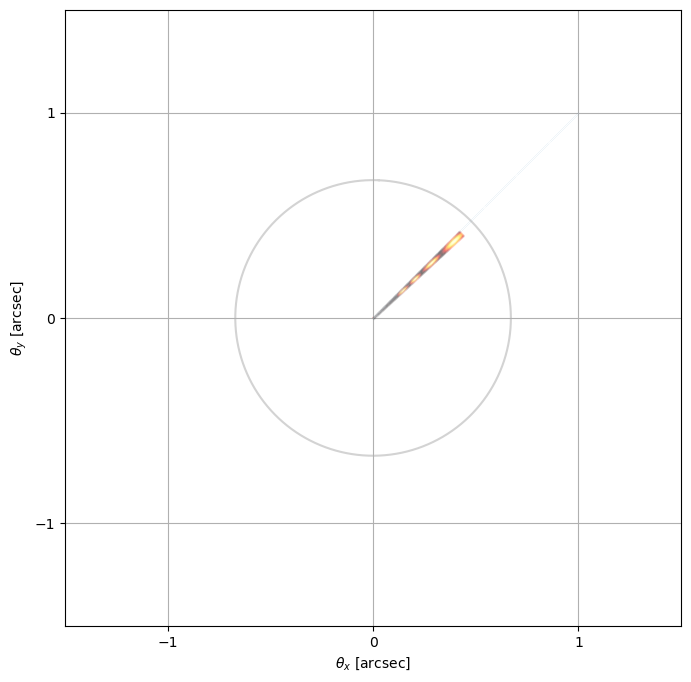

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))


line_x = np.linspace(0,1,200)
plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(line_x,line_x, s =.0005,zorder = 2)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [18]:
thetarot = 1.5*np.pi/180
mesh_x_1 = np.array(mesh_x)*np.cos(thetarot) -  np.array(mesh_y)*np.sin(thetarot) 
mesh_y_1 = np.array(mesh_x)*np.sin(thetarot) +  np.array(mesh_y)*np.cos(thetarot) 

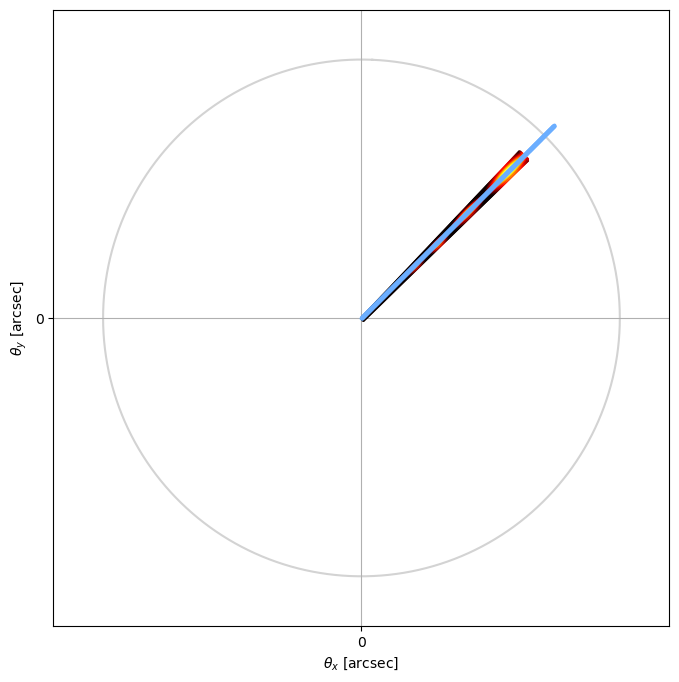

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))


line_x = np.linspace(0,.5,1500)
plt.scatter(mesh_x_1,mesh_y_1, s = 1, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(line_x,line_x, s =3, color = '#6baeff', zorder = 4)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-.8, .8])
ax.set_ylim([-.8, .8])
plt.grid()
fig.savefig(my_path + 'image37.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [20]:
mesh_x_1_line = []
mesh_y_1_line = []
mesh_light_line = []
for i in range(len(mesh_x_1)):
    a = 0
    for j in range(len(line_x)):
        if np.sqrt( (mesh_x_1[i]-line_x[j])**2 + (mesh_y_1[i]-line_x[j])**2 ) < .00093:
            a = 1
    if a == 1:
        mesh_x_1_line.append(mesh_x_1[i])
        mesh_y_1_line.append(mesh_y_1[i])
        mesh_light_line.append(mesh_light[i])
        

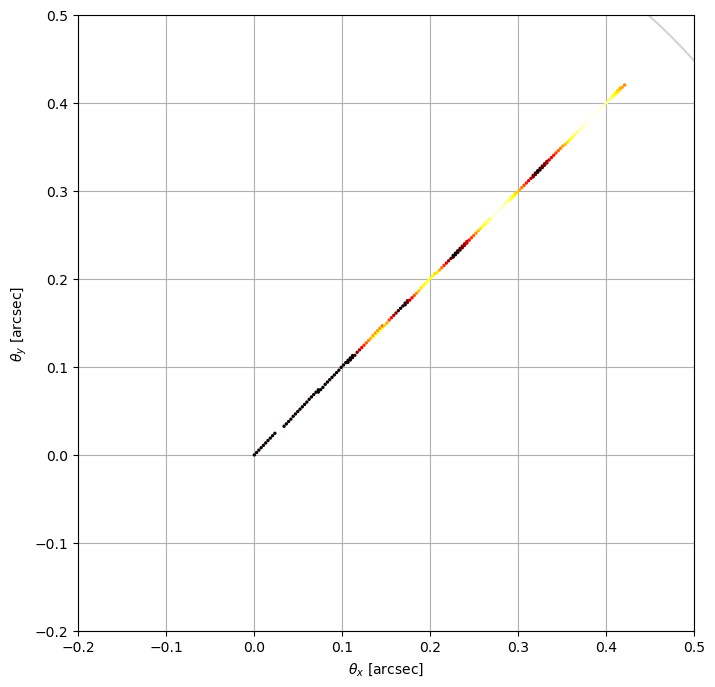

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-1., 1., .1))
ax.set_yticks(np.arange(-1., 1., .1))


line_x = np.linspace(0,1,200)
plt.scatter(mesh_x_1_line,mesh_y_1_line, s =2, c=mesh_light_line, cmap='hot',zorder = 2)
#plt.scatter(line_x,line_x, s =.0005,zorder = 2)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-0.2, .5])
ax.set_ylim([-0.2, .5])
plt.grid()
plt.show()

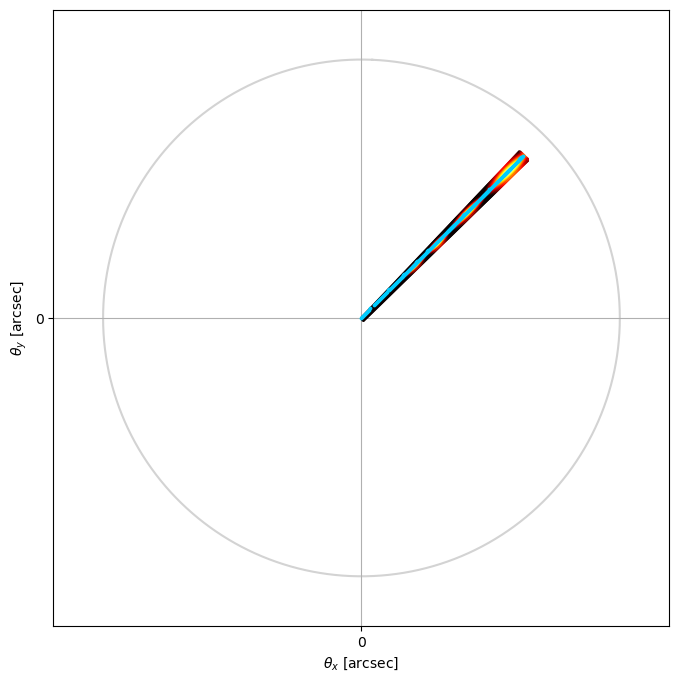

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))


line_x = np.linspace(0,.5,1500)
plt.scatter(mesh_x_1,mesh_y_1, s = 1, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(mesh_x_1_line,mesh_y_1_line, s = 3,color = '#00ccff',zorder = 2)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-.8, .8])
ax.set_ylim([-.8, .8])
plt.grid()
fig.savefig(my_path + 'image37.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [23]:
pd = [] #projected distance from core for elements in the line
for i in range(len(mesh_x_1_line)):
    a = np.sqrt(mesh_x_1_line[i]**2 + mesh_y_1_line[i]**2)
    pd.append(a)

In [24]:
mesh_x_1_line = np.array(mesh_x_1_line) + .05
mesh_y_1_line = np.array(mesh_y_1_line) + .05

In [25]:
x_image_1_line, y_image_1_line, light_1, mag_line_1, dt_line_1 = main_2(mesh_x_1_line, mesh_y_1_line, mesh_light_line)

time:  0.030292812983194986  minutes


In [26]:
mag_line_1_ = []
for i in range(len(mag_line_1)):
    if (i % 2) == 0:
        mag_line_1_.append(mag_line_1[i])

In [27]:
magdiff1 = np.abs(mag_line_1 - mag_line_1[0])

In [28]:
magdiff1_ = []
for i in range(len(magdiff1)):
    if (i % 2) == 0:
        magdiff1_.append(magdiff1[i])

In [29]:
dtdiff1 = np.abs(dt_line_1 - dt_line_1[0])

In [30]:
dt_line_1_ = []
for i in range(len(dt_line_1)):
    if (i % 2) == 0:
        dt_line_1_.append(dt_line_1[i])

In [31]:
dtdiff1_ = []
for i in range(len(dtdiff1)):
    if (i % 2) == 0:
        dtdiff1_.append(dtdiff1[i])

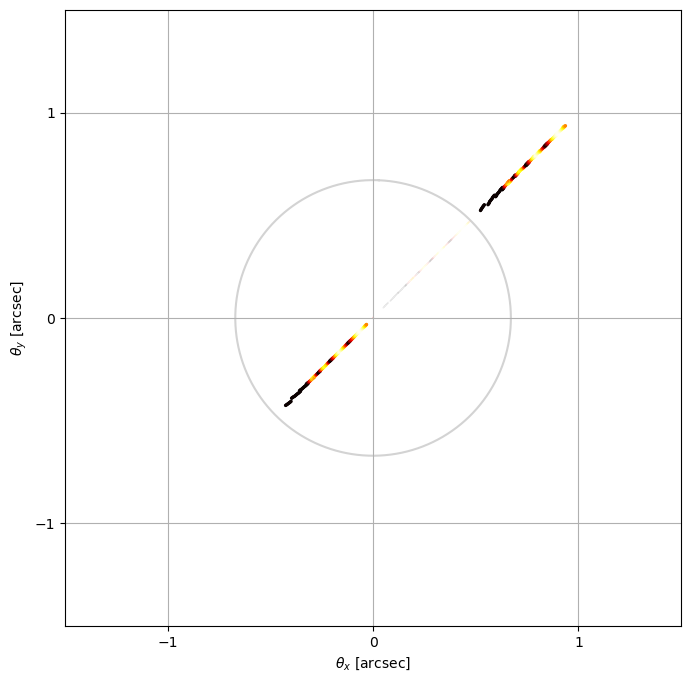

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x_1_line,mesh_y_1_line, s =.0005, c=mesh_light_line, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_1_line, y_image_1_line, c=light_1, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [33]:
mesh_x_1 = np.array(mesh_x_1) + 0.05
mesh_y_1 = np.array(mesh_y_1) + 0.05

In [34]:
x_image_1, y_image_1, light_1 = main(mesh_x_1,mesh_y_1,mesh_light)

time:  0.17464980681737263  minutes


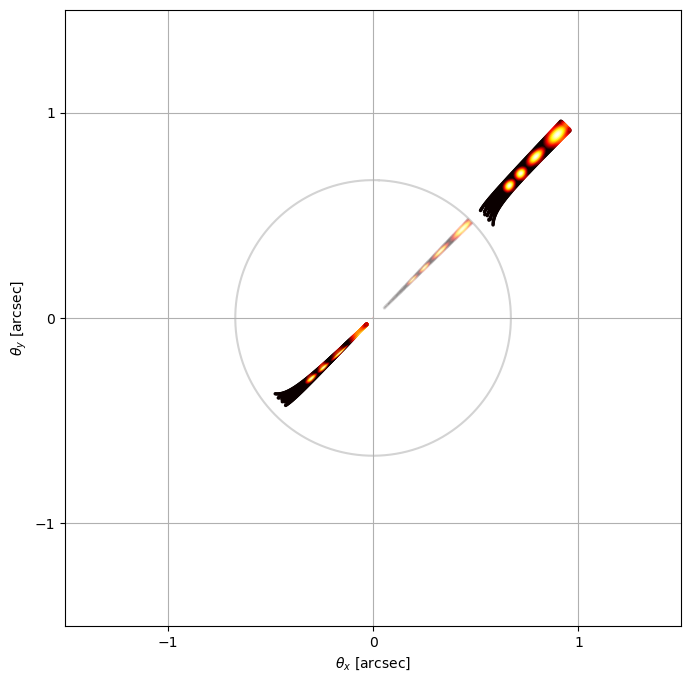

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x_1,mesh_y_1, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_1, y_image_1, c=light_1, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image37.5.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [36]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_2 = np.array(mesh_x_1)*np.cos(thetarot) -  np.array(mesh_y_1)*np.sin(thetarot) - .5
mesh_y_2 = np.array(mesh_x_1)*np.sin(thetarot) +  np.array(mesh_y_1)*np.cos(thetarot) + .4



In [37]:
x_image_2, y_image_2, light_2 = main(mesh_x_2,mesh_y_2,mesh_light)

time:  0.16713172992070516  minutes


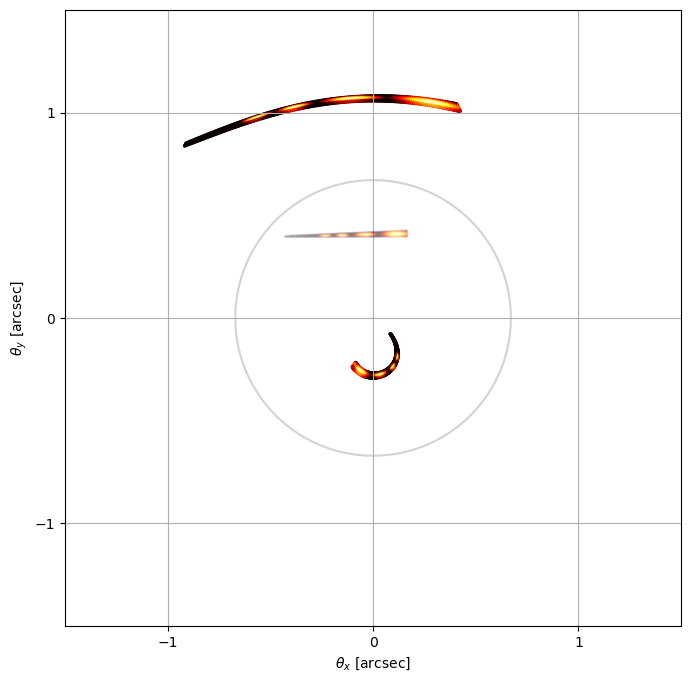

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x_2,mesh_y_2, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_2, y_image_2, c=light_2, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image38.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [39]:
mesh_x_2_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .5
mesh_y_2_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) + .4

In [40]:
x_image_2_line, y_image_2_line, light_2_line, mag_line_2, dt_line_2 = main_2(mesh_x_2_line,mesh_y_2_line,mesh_light_line)

time:  0.026941859722137453  minutes


In [41]:
mag_line_2_ = []
for i in range(len(mag_line_2)):
    if (i % 2) == 0:
        mag_line_2_.append(mag_line_2[i])

In [42]:
magdiff2 = np.abs(mag_line_2 - mag_line_2[0])

In [43]:
magdiff2_ = []
for i in range(len(magdiff2)):
    if (i % 2) == 0:
        magdiff2_.append(magdiff2[i])

In [44]:
dt_line_2_ = []
for i in range(len(dt_line_2)):
    if (i % 2) == 0:
        dt_line_2_.append(dt_line_2[i])

In [45]:
dtdiff2 = np.abs(dt_line_2 - dt_line_2[0])

In [46]:
dtdiff2_ = []
for i in range(len(dtdiff2)):
    if (i % 2) == 0:
        dtdiff2_.append(dtdiff2[i])

In [47]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_3 = np.array(mesh_x_1)*np.cos(thetarot) -  np.array(mesh_y_1)*np.sin(thetarot) - .2
mesh_y_3 = np.array(mesh_x_1)*np.sin(thetarot) +  np.array(mesh_y_1)*np.cos(thetarot) + .5



In [48]:
x_image_3, y_image_3, light_3 = main(mesh_x_3,mesh_y_3,mesh_light)

time:  0.17484906514485676  minutes


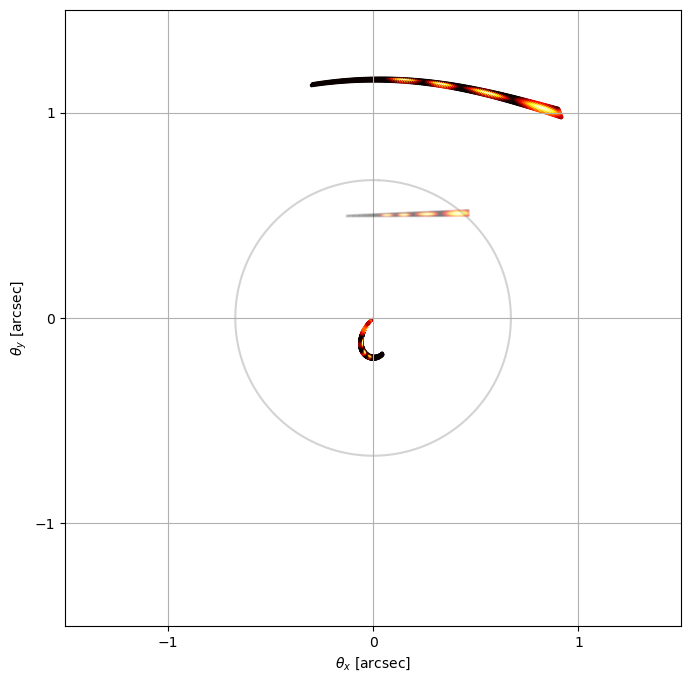

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x_3,mesh_y_3, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_3, y_image_3, c=light_3, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image39.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [50]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_3_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .2
mesh_y_3_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) + .5

In [51]:
x_image_3_line, y_image_3_line, light_3_line, mag_line_3, dt_line_3 = main_2(mesh_x_3_line,mesh_y_3_line,mesh_light_line)

time:  0.01983635425567627  minutes


In [52]:
mag_line_3_ = []
for i in range(len(mag_line_3)):
    if (i % 2) == 0:
        mag_line_3_.append(mag_line_3[i])

In [53]:
magdiff3 = np.abs(mag_line_3 - mag_line_3[0])

In [54]:
magdiff3_ = []
for i in range(len(magdiff3)):
    if (i % 2) == 0:
        magdiff3_.append(magdiff3[i])

In [55]:
dt_line_3_ = []
for i in range(len(dt_line_3)):
    if (i % 2) == 0:
        dt_line_3_.append(dt_line_3[i])

In [56]:
dtdiff3 = np.abs(dt_line_3 - dt_line_3[0])

In [57]:
dtdiff3_ = []
for i in range(len(dtdiff3)):
    if (i % 2) == 0:
        dtdiff3_.append(dtdiff3[i])

In [58]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_4 = np.array(mesh_x_1)*np.cos(thetarot) -  np.array(mesh_y_1)*np.sin(thetarot) - .3
mesh_y_4 = np.array(mesh_x_1)*np.sin(thetarot) +  np.array(mesh_y_1)*np.cos(thetarot) - .2



In [59]:
x_image_4, y_image_4, light_4 = main(mesh_x_4,mesh_y_4,mesh_light)

time:  0.1699831446011861  minutes


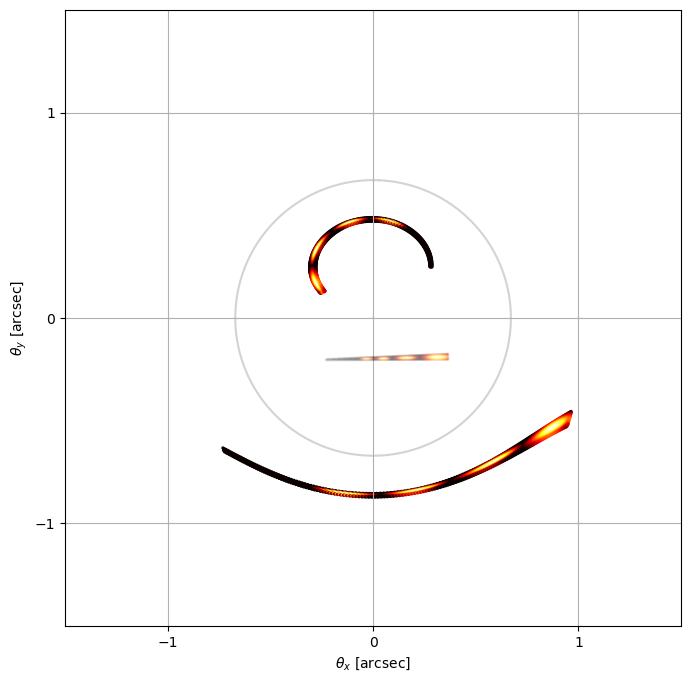

In [60]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x_4,mesh_y_4, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_4, y_image_4, c=light_4, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image40.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [61]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_4_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .3
mesh_y_4_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) - .2

In [62]:
x_image_4_line, y_image_4_line, light_4_line, mag_line_4, dt_line_4 = main_2(mesh_x_4_line,mesh_y_4_line,mesh_light_line)

time:  0.019856524467468262  minutes


In [63]:
mag_line_4_ = []
for i in range(len(mag_line_4)):
    if (i % 2) == 0:
        mag_line_4_.append(mag_line_4[i])

magdiff4 = np.abs(mag_line_4 - mag_line_4[0])

magdiff4_ = []
for i in range(len(magdiff4)):
    if (i % 2) == 0:
        magdiff4_.append(magdiff4[i])

dt_line_4_ = []
for i in range(len(dt_line_4)):
    if (i % 2) == 0:
        dt_line_4_.append(dt_line_4[i])

dtdiff4 = np.abs(dt_line_4 - dt_line_4[0])

dtdiff4_ = []
for i in range(len(dtdiff4)):
    if (i % 2) == 0:
        dtdiff4_.append(dtdiff4[i])

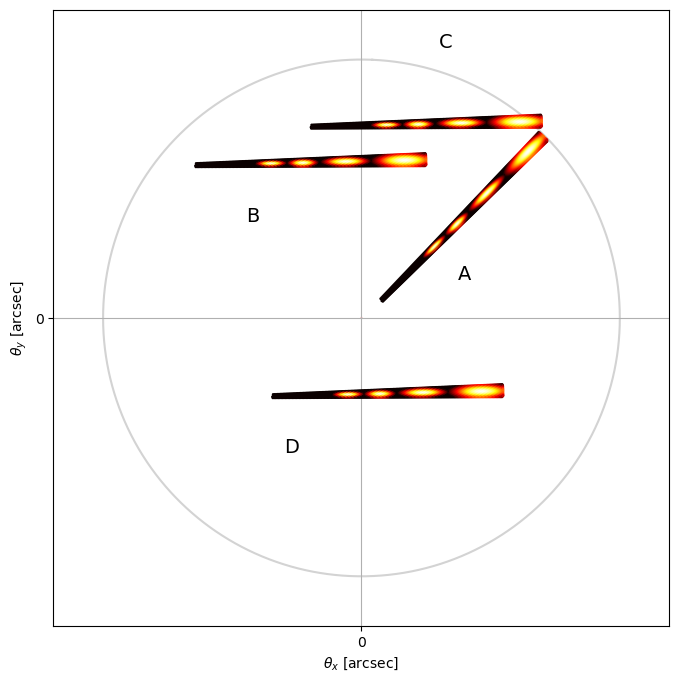

In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))



plt.scatter(mesh_x_1,mesh_y_1, s =1, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(mesh_x_2,mesh_y_2, s =1, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(mesh_x_3,mesh_y_3, s =1, c=mesh_light, cmap='hot',zorder = 2)
plt.scatter(mesh_x_4,mesh_y_4, s =1, c=mesh_light, cmap='hot',zorder = 2)
plt.plot(SSS[0][0],SSS[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSS[2][0],SSS[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-.8, .8])
ax.set_ylim([-.8, .8])
plt.text(.25,.1,'A', fontsize = 14)
plt.text(-.3,.25,'B', fontsize = 14)
plt.text(.2,.7,'C', fontsize = 14)
plt.text(-.2,-.35,'D', fontsize = 14)
plt.grid()
fig.savefig(my_path + 'image41.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

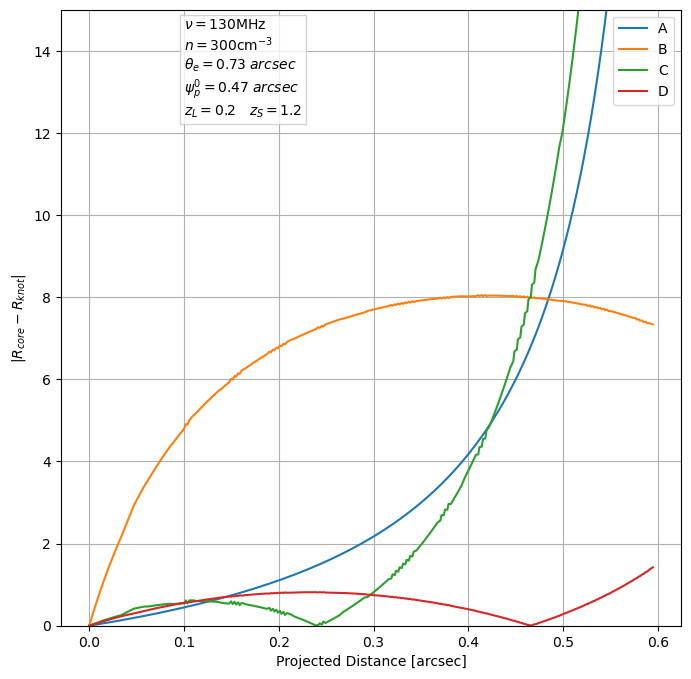

In [65]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,magdiff1_, label='A')
ax.plot(pd,magdiff2_, label='B')
ax.plot(pd,magdiff3_, label='C')
ax.plot(pd,magdiff4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|R_{core}-R_{knot}|$')
ax.legend()
ax.set_ylim([0, 15])
plt.grid()
props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
textstr = '\n'.join((
    r'$\nu = 130 \mathrm{MHz}$',
    r'$n = 300 \mathrm{cm^{-3}}$',
    r'$\theta_e = 0.73 \;arcsec $',
    r'$\psi^0_p = 0.47 \;arcsec $',
    r'$z_L = 0.2 \quad z_S = 1.2$'))
ax.text(0.1, 14.8, textstr, fontsize=10,
        verticalalignment='top', bbox=props)

fig.savefig(my_path + 'image42.pdf', format='pdf', dpi = 300, bbox_inches='tight')

plt.show()

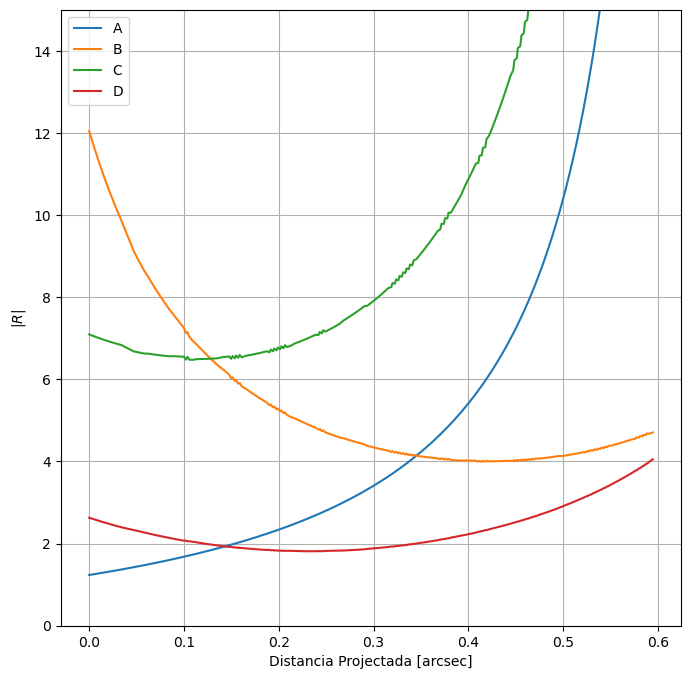

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,mag_line_1_, label='A')
ax.plot(pd,mag_line_2_, label='B')
ax.plot(pd,mag_line_3_, label='C')
ax.plot(pd,mag_line_4_, label='D')

ax.set_xlabel(r'Distancia Projectada [arcsec]')
ax.set_ylabel(r'$|R|$')
ax.legend(loc='upper left')
ax.set_ylim([0, 15])
plt.grid()
#props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
# textstr = '\n'.join((
#     r'$\nu = 130 \mathrm{MHz}$',
#     r'$n = 300 \mathrm{cm^{-3}}$',
#     r'$\theta_e = 0.73 \;arcsec $',
#     r'$\psi^0_p = 0.47 \;arcsec $',
#     r'$z_L = 0.2 \quad z_S = 1.2$'))
#ax.text(0.1, 14.8, textstr, fontsize=10,
#        verticalalignment='top', bbox=props)
fig.savefig(my_path + 'image43.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

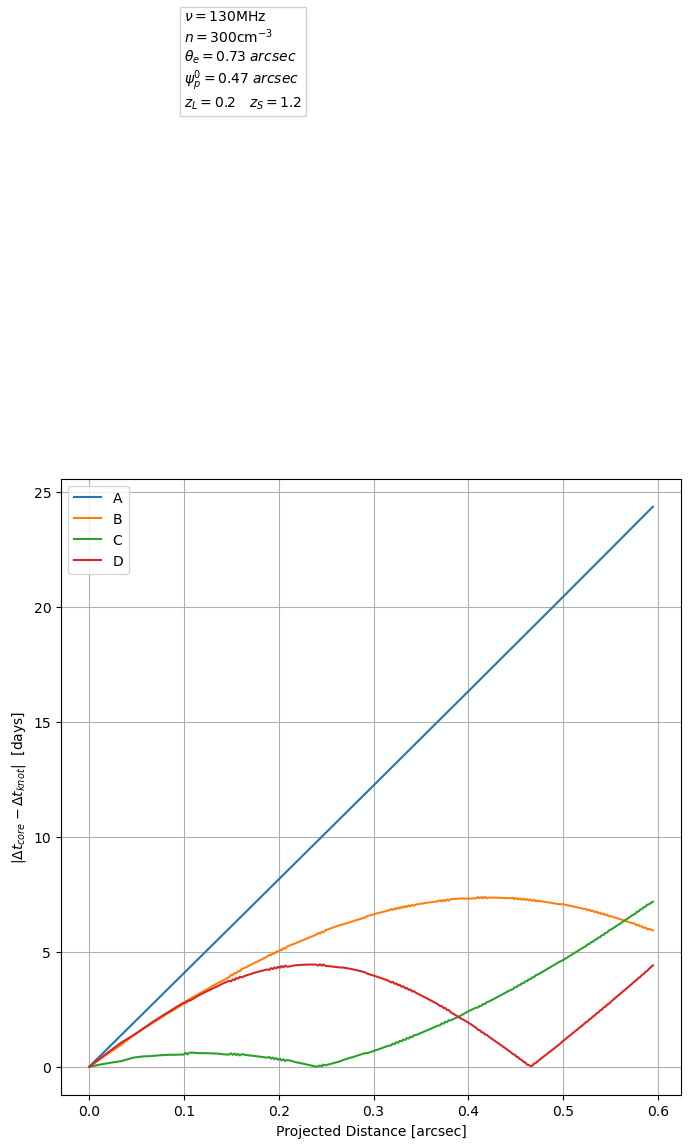

In [67]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dtdiff1_, label='A')
ax.plot(pd,dtdiff2_, label='B')
ax.plot(pd,dtdiff3_, label='C')
ax.plot(pd,dtdiff4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|\Delta t_{core}-\Delta t_{knot}|$  [days]')
ax.legend()
#ax.set_ylim([0, 15])
plt.grid()
props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
textstr = '\n'.join((
    r'$\nu = 130 \mathrm{MHz}$',
    r'$n = 300 \mathrm{cm^{-3}}$',
    r'$\theta_e = 0.73 \;arcsec $',
    r'$\psi^0_p = 0.47 \;arcsec $',
    r'$z_L = 0.2 \quad z_S = 1.2$'))
ax.text(0.1, 46, textstr, fontsize=10,
        verticalalignment='top', bbox=props)
fig.savefig(my_path + 'image44.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

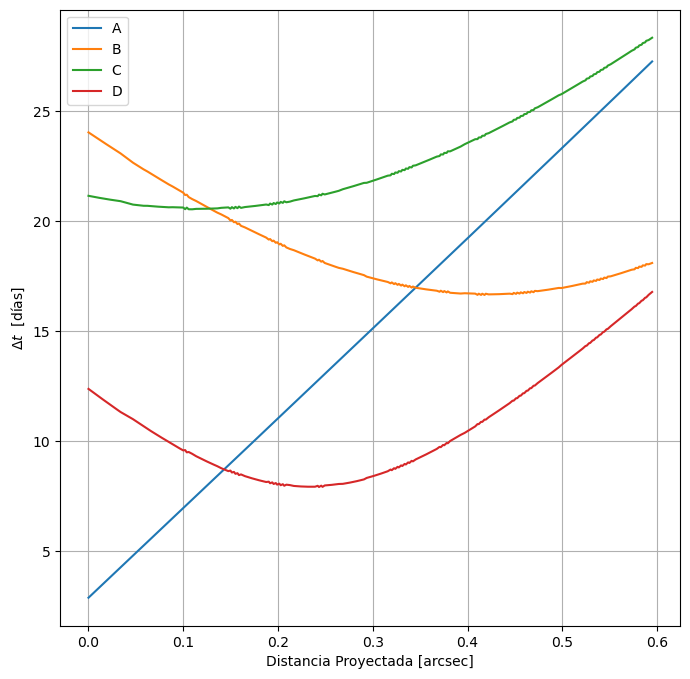

In [68]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dt_line_1_, label='A')
ax.plot(pd,dt_line_2_, label='B')
ax.plot(pd,dt_line_3_, label='C')
ax.plot(pd,dt_line_4_, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\Delta t$  [días]')
ax.legend()
#ax.set_ylim([0, 15])
plt.grid()
# props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
# textstr = '\n'.join((
#     r'$\nu = 130 \mathrm{MHz}$',
#     r'$n = 300 \mathrm{cm^{-3}}$',
#     r'$\theta_e = 0.73 \;arcsec $',
#     r'$\psi^0_p = 0.47 \;arcsec $',
#     r'$z_L = 0.2 \quad z_S = 1.2$'))
# ax.text(0.1, 54, textstr, fontsize=10,
#         verticalalignment='top', bbox=props)
fig.savefig(my_path + 'image45.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Infinite frequency (without plasma)

In [69]:
mesh_x_1_line_wp, mesh_y_1_line_wp, mesh_light_line_wp = mesh_x_1_line, mesh_y_1_line, mesh_light_line

In [70]:
kwargs = {'theta_E':theta_E_num.value,'eta':0*elipt, 'A':A, 'B':B, 'C':C ,'psi0_plasma':0*psi0_plasma.value,\
                'theta_0':theta_0.value}

kwargs_lens_list = [kwargs]
psi0_plasma = 0*u.m

In [71]:
x_image_1_line_wp, y_image_1_line_wp, light_1, mag_line_wp_1, dt_line_wp_1 = main_2(mesh_x_1_line_wp, mesh_y_1_line_wp, mesh_light_line_wp)

time:  0.01977532704671224  minutes


In [72]:
mag_line_wp_1_ = []
for i in range(len(mag_line_wp_1)):
    if (i % 2) == 0:
        mag_line_wp_1_.append(mag_line_wp_1[i])

In [73]:
magdiff_wp1 = np.abs(mag_line_wp_1 - mag_line_wp_1[0])

In [74]:
magdiff_wp1_ = []
for i in range(len(magdiff_wp1)):
    if (i % 2) == 0:
        magdiff_wp1_.append(magdiff_wp1[i])

In [75]:
dtdiff_wp1 = np.abs(dt_line_wp_1 - dt_line_wp_1[0])

In [76]:
dt_line_wp_1_ = []
for i in range(len(dt_line_wp_1)):
    if (i % 2) == 0:
        dt_line_wp_1_.append(dt_line_wp_1[i])

In [77]:
dtdiff_wp1_ = []
for i in range(len(dtdiff_wp1)):
    if (i % 2) == 0:
        dtdiff_wp1_.append(dtdiff_wp1[i])

In [78]:
mesh_x_2_line_wp = np.array(mesh_x_1_line_wp)*np.cos(thetarot) -  np.array(mesh_y_1_line_wp)*np.sin(thetarot) - .5
mesh_y_2_line_wp = np.array(mesh_x_1_line_wp)*np.sin(thetarot) +  np.array(mesh_y_1_line_wp)*np.cos(thetarot) + .4

In [79]:
x_image_2_line_wp, y_image_2_line_wp, light_2_line_wp, mag_line_wp_2, dt_line_wp_2 = main_2(mesh_x_2_line_wp,mesh_y_2_line_wp,mesh_light_line_wp)

time:  0.020284910996754963  minutes


In [80]:
mag_line_wp_2_ = []
for i in range(len(mag_line_wp_2)):
    if (i % 2) == 0:
        mag_line_wp_2_.append(mag_line_wp_2[i])

In [81]:
magdiff_wp2 = np.abs(mag_line_wp_2 - mag_line_wp_2[0])

In [82]:
magdiff_wp2_ = []
for i in range(len(magdiff_wp2)):
    if (i % 2) == 0:
        magdiff_wp2_.append(magdiff_wp2[i])

In [83]:
dt_line_wp_2_ = []
for i in range(len(dt_line_wp_2)):
    if (i % 2) == 0:
        dt_line_wp_2_.append(dt_line_wp_2[i])

In [84]:
dtdiff_wp2 = np.abs(dt_line_wp_2 - dt_line_wp_2[0])

In [85]:
dtdiff_wp2_ = []
for i in range(len(dtdiff_wp2)):
    if (i % 2) == 0:
        dtdiff_wp2_.append(dtdiff_wp2[i])

In [86]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_3_line_wp = np.array(mesh_x_1_line_wp)*np.cos(thetarot) -  np.array(mesh_y_1_line_wp)*np.sin(thetarot) - .2
mesh_y_3_line_wp = np.array(mesh_x_1_line_wp)*np.sin(thetarot) +  np.array(mesh_y_1_line_wp)*np.cos(thetarot) + .5

In [87]:
x_image_3_line_wp, y_image_3_line_wp, light_3_line_wp, mag_line_wp_3, dt_line_wp_3 = main_2(mesh_x_3_line_wp,mesh_y_3_line_wp,mesh_light_line_wp)

time:  0.01984564463297526  minutes


In [88]:
mag_line_wp_3_ = []
for i in range(len(mag_line_wp_3)):
    if (i % 2) == 0:
        mag_line_wp_3_.append(mag_line_wp_3[i])

In [89]:
magdiff_wp3 = np.abs(mag_line_wp_3 - mag_line_wp_3[0])

In [90]:
magdiff_wp3_ = []
for i in range(len(magdiff_wp3)):
    if (i % 2) == 0:
        magdiff_wp3_.append(magdiff_wp3[i])

In [91]:
dt_line_wp_3_ = []
for i in range(len(dt_line_wp_3)):
    if (i % 2) == 0:
        dt_line_wp_3_.append(dt_line_wp_3[i])

In [92]:
dtdiff_wp3 = np.abs(dt_line_wp_3 - dt_line_wp_3[0])

In [93]:
dtdiff_wp3_ = []
for i in range(len(dtdiff_wp3)):
    if (i % 2) == 0:
        dtdiff_wp3_.append(dtdiff_wp3[i])

In [94]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_4_line_wp = np.array(mesh_x_1_line_wp)*np.cos(thetarot) -  np.array(mesh_y_1_line_wp)*np.sin(thetarot) - .3
mesh_y_4_line_wp = np.array(mesh_x_1_line_wp)*np.sin(thetarot) +  np.array(mesh_y_1_line_wp)*np.cos(thetarot) - .2

In [95]:
x_image_4_line_wp, y_image_4_line_wp, light_4_line_wp, mag_line_wp_4, dt_line_wp_4 = main_2(mesh_x_4_line_wp,mesh_y_4_line_wp,mesh_light_line_wp)

time:  0.02029441197713216  minutes


In [96]:
mag_line_wp_4_ = []
for i in range(len(mag_line_wp_4)):
    if (i % 2) == 0:
        mag_line_wp_4_.append(mag_line_wp_4[i])

magdiff_wp4 = np.abs(mag_line_wp_4 - mag_line_wp_4[0])

magdiff_wp4_ = []
for i in range(len(magdiff_wp4)):
    if (i % 2) == 0:
        magdiff_wp4_.append(magdiff_wp4[i])

dt_line_wp_4_ = []
for i in range(len(dt_line_wp_4)):
    if (i % 2) == 0:
        dt_line_wp_4_.append(dt_line_wp_4[i])

dtdiff_wp4 = np.abs(dt_line_wp_4 - dt_line_wp_4[0])

dtdiff_wp4_ = []
for i in range(len(dtdiff_wp4)):
    if (i % 2) == 0:
        dtdiff_wp4_.append(dtdiff_wp4[i])

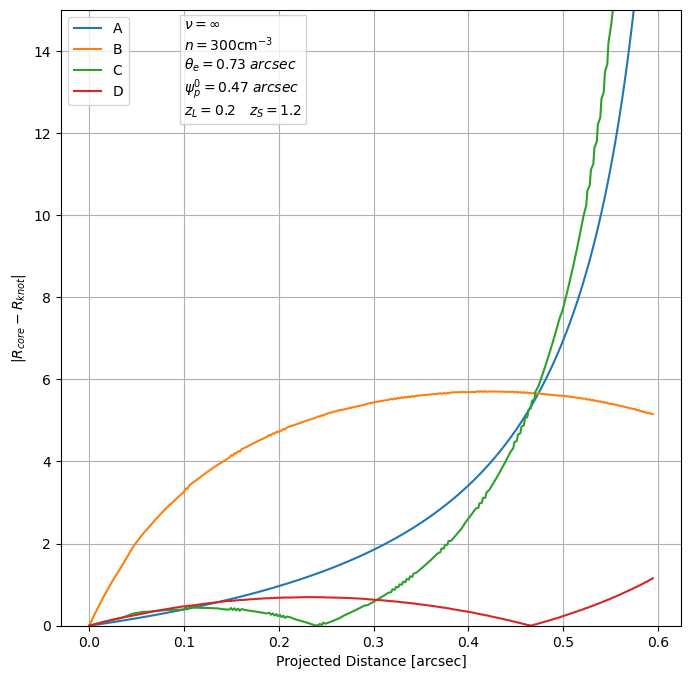

In [97]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,magdiff_wp1_, label='A')
ax.plot(pd,magdiff_wp2_, label='B')
ax.plot(pd,magdiff_wp3_, label='C')
ax.plot(pd,magdiff_wp4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|R_{core}-R_{knot}|$')
ax.legend()
ax.set_ylim([0, 15])
plt.grid()
props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
textstr = '\n'.join((
    r'$\nu = \infty $',
    r'$n = 300 \mathrm{cm^{-3}}$',
    r'$\theta_e = 0.73 \;arcsec $',
    r'$\psi^0_p = 0.47 \;arcsec $',
    r'$z_L = 0.2 \quad z_S = 1.2$'))
ax.text(0.1, 14.8, textstr, fontsize=10,
        verticalalignment='top', bbox=props)
fig.savefig(my_path + 'image46.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

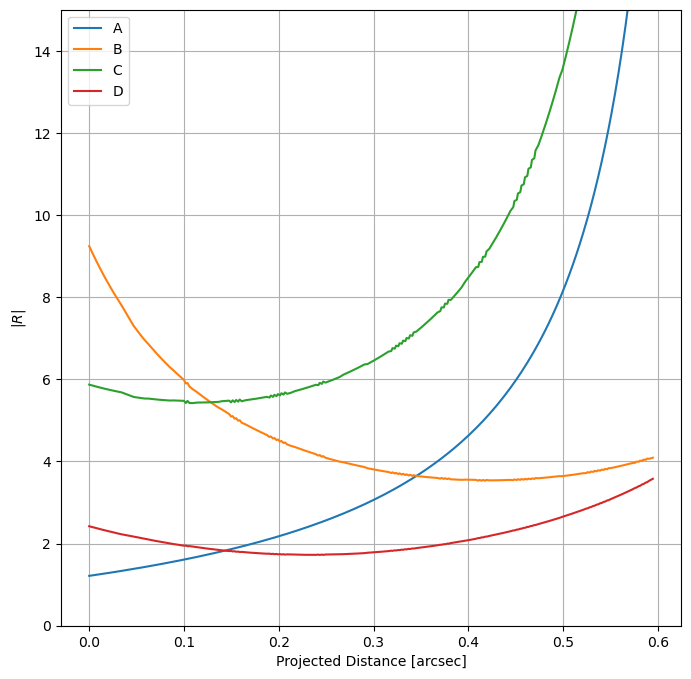

In [98]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,mag_line_wp_1_, label='A')
ax.plot(pd,mag_line_wp_2_, label='B')
ax.plot(pd,mag_line_wp_3_, label='C')
ax.plot(pd,mag_line_wp_4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|R|$')
ax.legend()
ax.set_ylim([0, 15])
plt.grid()
fig.savefig(my_path + 'image47.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

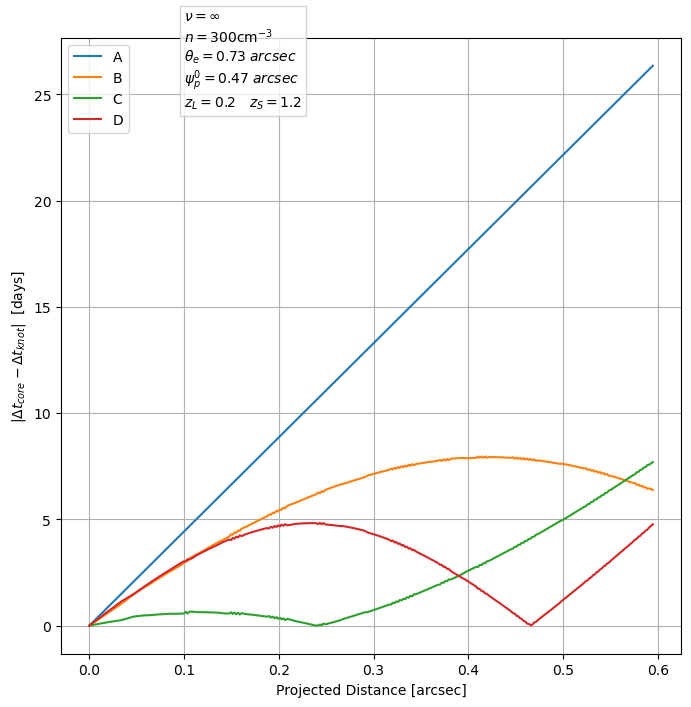

In [99]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dtdiff_wp1_, label='A')
ax.plot(pd,dtdiff_wp2_, label='B')
ax.plot(pd,dtdiff_wp3_, label='C')
ax.plot(pd,dtdiff_wp4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|\Delta t_{core}-\Delta t_{knot}|$  [days]')
ax.legend()
plt.grid()
props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
textstr = '\n'.join((
    r'$\nu = \infty $',
    r'$n = 300 \mathrm{cm^{-3}}$',
    r'$\theta_e = 0.73 \;arcsec $',
    r'$\psi^0_p = 0.47 \;arcsec $',
    r'$z_L = 0.2 \quad z_S = 1.2$'))
ax.text(0.1, 29, textstr, fontsize=10,
        verticalalignment='top', bbox=props)
fig.savefig(my_path + 'image48.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

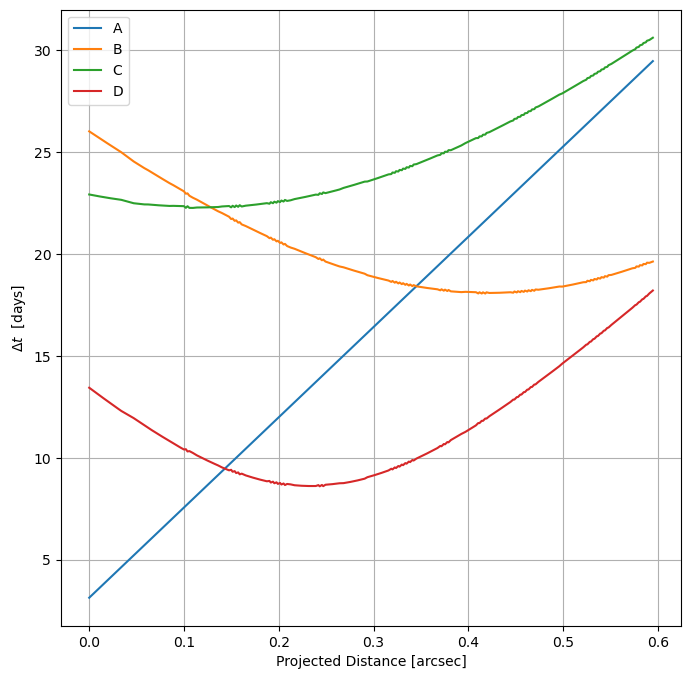

In [100]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dt_line_wp_1_, label='A')
ax.plot(pd,dt_line_wp_2_, label='B')
ax.plot(pd,dt_line_wp_3_, label='C')
ax.plot(pd,dt_line_wp_4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$\Delta t$  [days]')
ax.legend()
plt.grid()
fig.savefig(my_path + 'image49.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## Let's study where plasma effects are more important

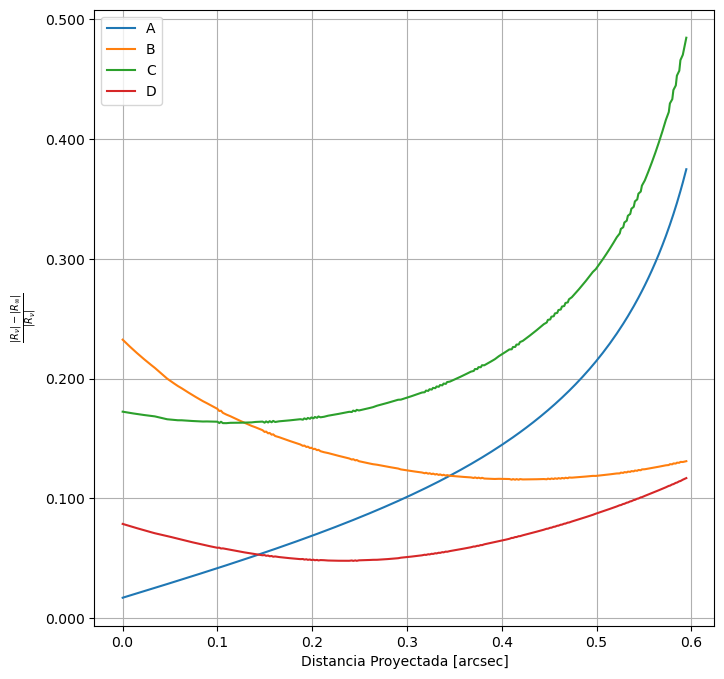

In [101]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()


m1 = (np.array(mag_line_1_) - np.array(mag_line_wp_1_))/np.array(mag_line_1_)
m2 = (np.array(mag_line_2_) - np.array(mag_line_wp_2_))/np.array(mag_line_2_)
m3 = (np.array(mag_line_3_) - np.array(mag_line_wp_3_))/np.array(mag_line_3_)
m4 = (np.array(mag_line_4_) - np.array(mag_line_wp_4_))/np.array(mag_line_4_)

ax.plot(pd, m1, label='A')
ax.plot(pd, m2, label='B')
ax.plot(pd, m3, label='C')
ax.plot(pd, m4, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\frac{|R_\nu| - |R_\infty|}{|R_\nu|}$')
ax.legend()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))
plt.grid()
fig.savefig(my_path + 'image50.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

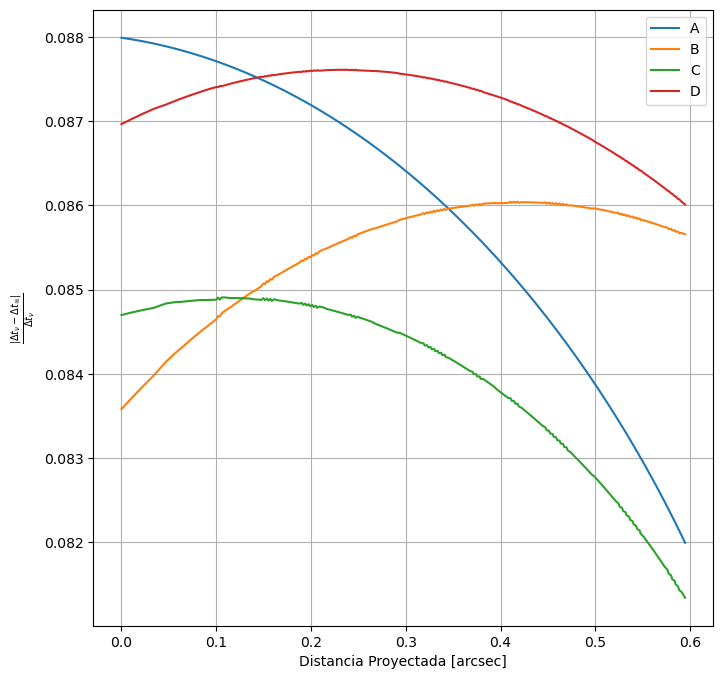

In [102]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()


d1 = np.abs(np.array(dt_line_1_) - np.array(dt_line_wp_1_))/np.array(dt_line_1_)
d2 = np.abs(np.array(dt_line_2_) - np.array(dt_line_wp_2_))/np.array(dt_line_2_)
d3 = np.abs(np.array(dt_line_3_) - np.array(dt_line_wp_3_))/np.array(dt_line_3_)
d4 = np.abs(np.array(dt_line_4_) - np.array(dt_line_wp_4_))/np.array(dt_line_4_)

ax.plot(pd, d1, label='A')
ax.plot(pd, d2, label='B')
ax.plot(pd, d3, label='C')
ax.plot(pd, d4, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\frac{|\Delta t_\nu - \Delta t_\infty|}{\Delta t_\nu}$')
ax.legend()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))
plt.grid()
fig.savefig(my_path + 'image51.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## We observe plasma effects are more detectable in the modification of images than in the time delay t. Now we study why the diference with plasma is inverted

In [205]:
def image_position_3(source):
    x_s, y_s,light = source
    x_pre, y_pre = lensEquationSolver.image_position_from_source(kwargs_lens=kwargs_lens_list, \
                    sourcePos_x=x_s, sourcePos_y=y_s, min_distance=0.05, search_window=5, \
                    precision_limit=10**(-8), num_iter_max=100,non_linear=True)
    light_pre = []
    mag = [0,0]
    t = [0,0]
    for k in range(len(x_pre)):
        light_pre = np.append(light_pre,light)
        mag[k] = lensModel.magnification(x_pre[k], y_pre[k], kwargs = kwargs_lens_list)
        phi = PlasmaExponentialSIE.function(perfil,x_pre[k], y_pre[k], theta_E_num.value,0*elipt,A,B,C ,0*psi0_plasma.value,theta_0.value)
        t[k] = ((1+zl)/c_light*Ds*Dl/Dls*( 1/2*( (x_s - x_pre[k] )**2 + (y_s - y_pre[k])**2) - phi)*(u.arcsec**2).to('rad**2')).to('s').value
    r = np.abs(mag[0]/mag[1])
    rr = [r,r]
    dt = np.abs(t[0] - t[1])/24/60/60 #convert seconds to days
    dt = [dt,dt]
    return x_pre, y_pre, light_pre, rr, dt

def main_3(x1,x2,x3):
    start_p = time.time()
    x = x1
    y = x2
    l = x3
    r = []
    dt = []
    
    with mp.Pool(mp.cpu_count()-1) as pool:
        out = pool.map(image_position_3, zip(x,y,l))
        
        xx = []; yy = []; ll = []
        for i in range(len(out)):
            x = out[i][0]
            xx.append(x)
            y = out[i][1]
            yy.append(y)
            l = out[i][2]
            ll.append(l)
            mag = out[i][3]
            r.append(mag)
            t = out[i][4]
            dt.append(t)
        xx = np.concatenate(xx, axis=0)
        yy = np.concatenate(yy, axis=0)
        ll = np.concatenate(ll, axis=0)
        r = np.concatenate(r, axis = 0)
        dt = np.concatenate(dt, axis = 0)
    end_p = time.time()
    pool.close()
    print('time: ',(end_p-start_p)/60.,' minutes')
        
    return xx, yy, ll, r, dt

In [206]:
mesh_x = mesh_x - mesh_x[0]
mesh_y = mesh_y - mesh_y[0]

In [207]:
lens_model_list = ['PlasmaExponentialSIE']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

In [208]:
A = 2.00744300029693
B = 1.5887225542022732
C = 1.4308204791467736


psi0_plasma = (A*Dls/Ds/Dl*2*pi*c_light**2/omega**2*re*n0*r0 \
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()



print('psi0_plasma: ',psi0_plasma)

kwargs = {'theta_E':theta_E_num.value,'eta':0*elipt, 'A':A, 'B':B, 'C':C ,'psi0_plasma':psi0_plasma.value,\
                'theta_0':theta_0.value}

kwargs_lens_list = [kwargs]

psi0_plasma:  0.47012437534577306


In [209]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSS = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)

In [210]:
thetarot = 1.5*np.pi/180
mesh_x_1 = np.array(mesh_x)*np.cos(thetarot) -  np.array(mesh_y)*np.sin(thetarot) 
mesh_y_1 = np.array(mesh_x)*np.sin(thetarot) +  np.array(mesh_y)*np.cos(thetarot) 

In [211]:
mesh_x_1_line = []
mesh_y_1_line = []
mesh_light_line = []
for i in range(len(mesh_x_1)):
    a = 0
    for j in range(len(line_x)):
        if np.sqrt( (mesh_x_1[i]-line_x[j])**2 + (mesh_y_1[i]-line_x[j])**2 ) < .00093:
            a = 1
    if a == 1:
        mesh_x_1_line.append(mesh_x_1[i])
        mesh_y_1_line.append(mesh_y_1[i])
        mesh_light_line.append(mesh_light[i])
        

In [212]:
pd = [] #projected distance from core for elements in the line
for i in range(len(mesh_x_1_line)):
    a = np.sqrt(mesh_x_1_line[i]**2 + mesh_y_1_line[i]**2)
    pd.append(a)

In [213]:
mesh_x_1_line = np.array(mesh_x_1_line) + .05
mesh_y_1_line = np.array(mesh_y_1_line) + .05

In [214]:
x_image_1_line, y_image_1_line, light_1, mag_line_1, dt_line_1 = main_3(mesh_x_1_line, mesh_y_1_line, mesh_light_line)

time:  0.030425310134887695  minutes


In [215]:
mag_line_1_ = []
for i in range(len(mag_line_1)):
    if (i % 2) == 0:
        mag_line_1_.append(mag_line_1[i])

In [216]:
magdiff1 = np.abs(mag_line_1 - mag_line_1[0])

In [217]:
magdiff1_ = []
for i in range(len(magdiff1)):
    if (i % 2) == 0:
        magdiff1_.append(magdiff1[i])

In [218]:
dtdiff1 = np.abs(dt_line_1 - dt_line_1[0])

In [219]:
dt_line_1_ = []
for i in range(len(dt_line_1)):
    if (i % 2) == 0:
        dt_line_1_.append(dt_line_1[i])

In [220]:
dtdiff1_ = []
for i in range(len(dtdiff1)):
    if (i % 2) == 0:
        dtdiff1_.append(dtdiff1[i])

In [221]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_2_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .5
mesh_y_2_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) + .4

In [222]:
x_image_2_line, y_image_2_line, light_2_line, mag_line_2, dt_line_2 = main_3(mesh_x_2_line,mesh_y_2_line,mesh_light_line)

time:  0.019210116068522135  minutes


In [223]:
mag_line_2_ = []
for i in range(len(mag_line_2)):
    if (i % 2) == 0:
        mag_line_2_.append(mag_line_2[i])

In [224]:
magdiff2 = np.abs(mag_line_2 - mag_line_2[0])

In [225]:
magdiff2_ = []
for i in range(len(magdiff2)):
    if (i % 2) == 0:
        magdiff2_.append(magdiff2[i])

In [226]:
dt_line_2_ = []
for i in range(len(dt_line_2)):
    if (i % 2) == 0:
        dt_line_2_.append(dt_line_2[i])

In [227]:
dtdiff2 = np.abs(dt_line_2 - dt_line_2[0])

In [228]:
dtdiff2_ = []
for i in range(len(dtdiff2)):
    if (i % 2) == 0:
        dtdiff2_.append(dtdiff2[i])

In [229]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_3_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .2
mesh_y_3_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) + .5

In [230]:
x_image_3_line, y_image_3_line, light_3_line, mag_line_3, dt_line_3 = main_3(mesh_x_3_line,mesh_y_3_line,mesh_light_line)

time:  0.019595714410146077  minutes


In [231]:
mag_line_3_ = []
for i in range(len(mag_line_3)):
    if (i % 2) == 0:
        mag_line_3_.append(mag_line_3[i])

In [232]:
magdiff3 = np.abs(mag_line_3 - mag_line_3[0])

In [233]:
magdiff3_ = []
for i in range(len(magdiff3)):
    if (i % 2) == 0:
        magdiff3_.append(magdiff3[i])

In [234]:
dt_line_3_ = []
for i in range(len(dt_line_3)):
    if (i % 2) == 0:
        dt_line_3_.append(dt_line_3[i])

In [235]:
dtdiff3 = np.abs(dt_line_3 - dt_line_3[0])

In [236]:
dtdiff3_ = []
for i in range(len(dtdiff3)):
    if (i % 2) == 0:
        dtdiff3_.append(dtdiff3[i])

In [237]:
thetarot = -np.pi/4. + np.pi/180
mesh_x_4_line = np.array(mesh_x_1_line)*np.cos(thetarot) -  np.array(mesh_y_1_line)*np.sin(thetarot) - .3
mesh_y_4_line = np.array(mesh_x_1_line)*np.sin(thetarot) +  np.array(mesh_y_1_line)*np.cos(thetarot) - .2

In [238]:
x_image_4_line, y_image_4_line, light_4_line, mag_line_4, dt_line_4 = main_3(mesh_x_4_line,mesh_y_4_line,mesh_light_line)

time:  0.01888879140218099  minutes


In [239]:
mag_line_4_ = []
for i in range(len(mag_line_4)):
    if (i % 2) == 0:
        mag_line_4_.append(mag_line_4[i])

magdiff4 = np.abs(mag_line_4 - mag_line_4[0])

magdiff4_ = []
for i in range(len(magdiff4)):
    if (i % 2) == 0:
        magdiff4_.append(magdiff4[i])

dt_line_4_ = []
for i in range(len(dt_line_4)):
    if (i % 2) == 0:
        dt_line_4_.append(dt_line_4[i])

dtdiff4 = np.abs(dt_line_4 - dt_line_4[0])

dtdiff4_ = []
for i in range(len(dtdiff4)):
    if (i % 2) == 0:
        dtdiff4_.append(dtdiff4[i])

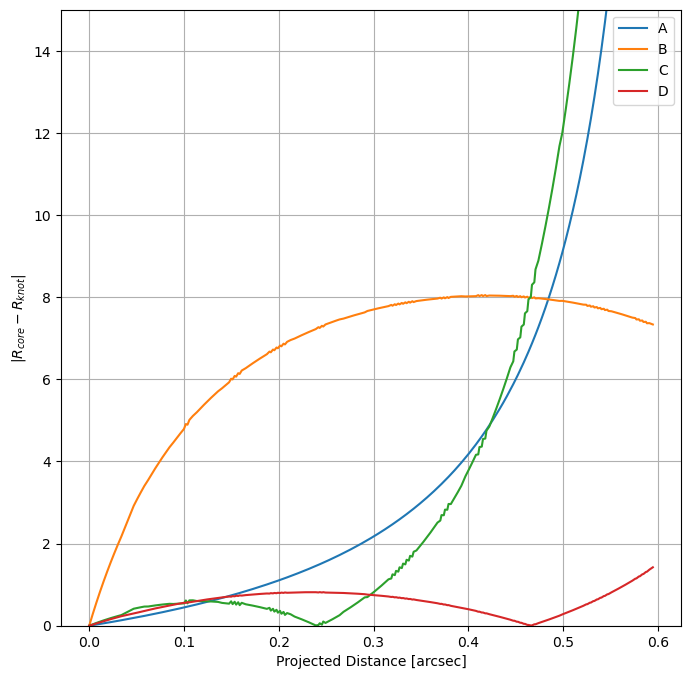

In [240]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,magdiff1_, label='A')
ax.plot(pd,magdiff2_, label='B')
ax.plot(pd,magdiff3_, label='C')
ax.plot(pd,magdiff4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|R_{core}-R_{knot}|$')
ax.legend()
ax.set_ylim([0, 15])
plt.grid()


plt.show()

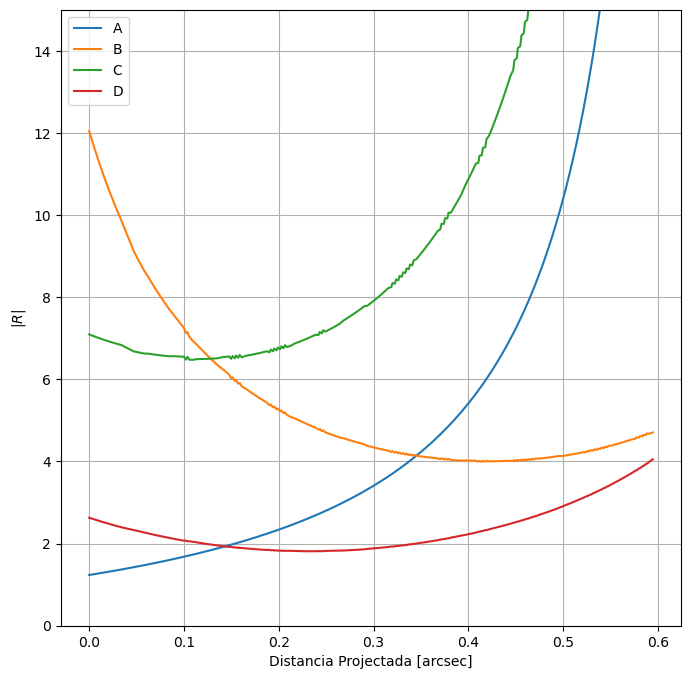

In [241]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,mag_line_1_, label='A')
ax.plot(pd,mag_line_2_, label='B')
ax.plot(pd,mag_line_3_, label='C')
ax.plot(pd,mag_line_4_, label='D')

ax.set_xlabel(r'Distancia Projectada [arcsec]')
ax.set_ylabel(r'$|R|$')
ax.legend(loc='upper left')
ax.set_ylim([0, 15])
plt.grid()

plt.show()

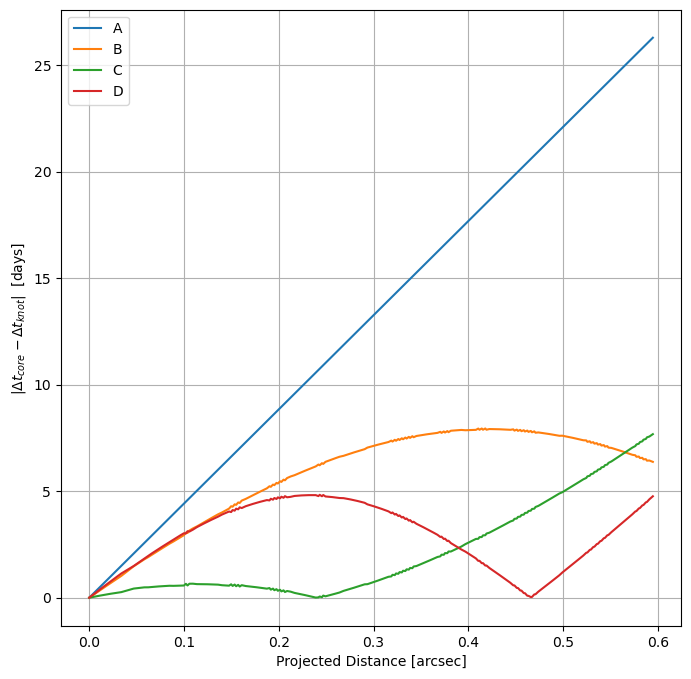

In [242]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dtdiff1_, label='A')
ax.plot(pd,dtdiff2_, label='B')
ax.plot(pd,dtdiff3_, label='C')
ax.plot(pd,dtdiff4_, label='D')

ax.set_xlabel(r'Projected Distance [arcsec]')
ax.set_ylabel(r'$|\Delta t_{core}-\Delta t_{knot}|$  [days]')
ax.legend()
#ax.set_ylim([0, 15])
plt.grid()

plt.show()

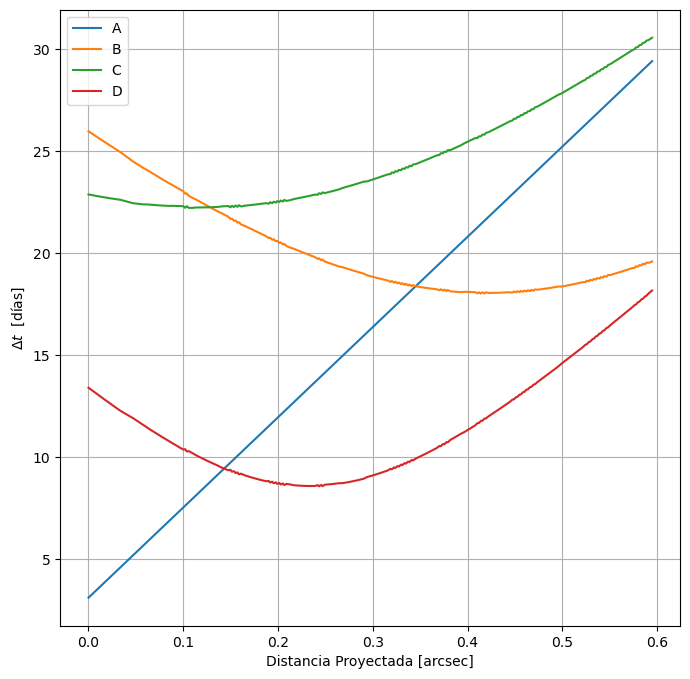

In [243]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(pd,dt_line_1_, label='A')
ax.plot(pd,dt_line_2_, label='B')
ax.plot(pd,dt_line_3_, label='C')
ax.plot(pd,dt_line_4_, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\Delta t$  [días]')
ax.legend()
#ax.set_ylim([0, 15])
plt.grid()
# props = dict(boxstyle='square', facecolor='white', alpha=.8, edgecolor = '#cacaca')
# textstr = '\n'.join((
#     r'$\nu = 130 \mathrm{MHz}$',
#     r'$n = 300 \mathrm{cm^{-3}}$',
#     r'$\theta_e = 0.73 \;arcsec $',
#     r'$\psi^0_p = 0.47 \;arcsec $',
#     r'$z_L = 0.2 \quad z_S = 1.2$'))
# ax.text(0.1, 54, textstr, fontsize=10,
#         verticalalignment='top', bbox=props)
plt.show()

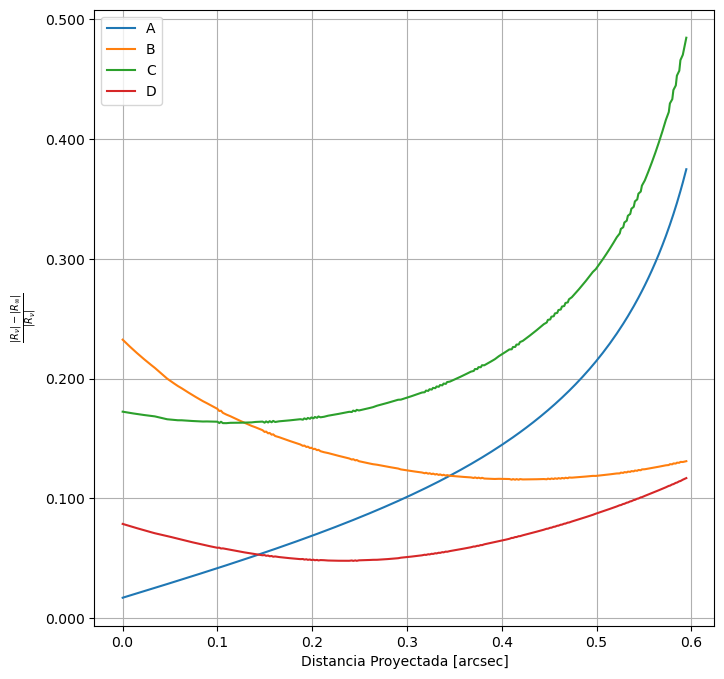

In [244]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()


m1 = (np.array(mag_line_1_) - np.array(mag_line_wp_1_))/np.array(mag_line_1_)
m2 = (np.array(mag_line_2_) - np.array(mag_line_wp_2_))/np.array(mag_line_2_)
m3 = (np.array(mag_line_3_) - np.array(mag_line_wp_3_))/np.array(mag_line_3_)
m4 = (np.array(mag_line_4_) - np.array(mag_line_wp_4_))/np.array(mag_line_4_)

ax.plot(pd, m1, label='A')
ax.plot(pd, m2, label='B')
ax.plot(pd, m3, label='C')
ax.plot(pd, m4, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\frac{|R_\nu| - |R_\infty|}{|R_\nu|}$')
ax.legend()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))
plt.grid()

plt.show()

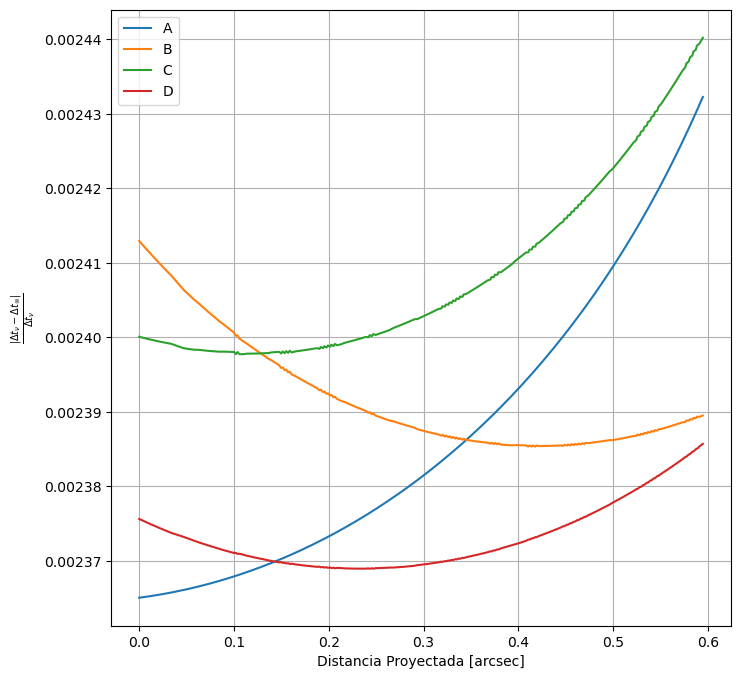

In [249]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()


d1 = np.abs(np.array(dt_line_1_) - np.array(dt_line_wp_1_))/np.array(dt_line_1_)
d2 = np.abs(np.array(dt_line_2_) - np.array(dt_line_wp_2_))/np.array(dt_line_2_)
d3 = np.abs(np.array(dt_line_3_) - np.array(dt_line_wp_3_))/np.array(dt_line_3_)
d4 = np.abs(np.array(dt_line_4_) - np.array(dt_line_wp_4_))/np.array(dt_line_4_)

ax.plot(pd, d1, label='A')
ax.plot(pd, d2, label='B')
ax.plot(pd, d3, label='C')
ax.plot(pd, d4, label='D')

ax.set_xlabel(r'Distancia Proyectada [arcsec]')
ax.set_ylabel(r'$\frac{|\Delta t_\nu - \Delta t_\infty|}{\Delta t_\nu}$')
ax.legend()
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))
plt.grid()
fig.savefig(my_path + 'image51.5.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [246]:
end_total = time.time()
print('total time: ',(end_total-start_total)/60.,' minutes')


total time:  9.896209327379863  minutes
